In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

In [2]:
#import data from data_third_interval (first interval readings)
data_third_interval=pd.read_csv('data_third_interval.csv')
data_third_interval.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,2019.0,2014.0,2014.0,2014.0,2009.0,2009.0,2003.0,2003.0,2003.0,2006.0,2006.0,2008.0,2008.0,2008.0,1978.0,1978.0,1998.0,1998.0,1998.0,1982.0,1982.0,2007.0,2007.0,2007.0,1987.0,1987.0,2010.0,2010.0,1998.0,1998.0,1998.0,1958.0,1958.0,1993.0,1993.0,1993.0,1957.0,1957.0,2016.0,2016.0,...,1953.0,1964.0,1964.0,1964.0,1943.0,1943.0,1937.0,1937.0,1955.0,1955.0,1955.0,1958.0,1958.0,1939.0,1939.0,1939.0,1911.0,1911.0,1951.0,1951.0,1951.0,1904.0,1904.0,1895.0,1895.0,1895.0,1900.0,1900.0,1942.0,1942.0,1942.0,1900.0,1900.0,1938.0,1938.0,1938.0,1924.0,1924.0,1929.0,1929.0
1,1965.0,1965.0,1960.0,1960.0,1960.0,1959.0,1959.0,1948.0,1948.0,1948.0,1954.0,1954.0,1964.0,1964.0,1964.0,1962.0,1962.0,1957.0,1957.0,1957.0,1955.0,1955.0,1952.0,1952.0,1952.0,1963.0,1963.0,1947.0,1947.0,1947.0,1947.0,1947.0,1947.0,1947.0,1947.0,1964.0,1964.0,1942.0,1942.0,1942.0,...,2021.0,2021.0,2013.0,2013.0,2013.0,1994.0,1994.0,2000.0,2000.0,2000.0,1988.0,1988.0,2009.0,2009.0,2009.0,2021.0,2021.0,2016.0,2016.0,2016.0,2037.0,2037.0,2024.0,2024.0,2024.0,2001.0,2001.0,2033.0,2033.0,2033.0,2020.0,2020.0,2032.0,2032.0,2032.0,2011.0,2011.0,2005.0,2005.0,2005.0
2,1942.0,1912.0,1912.0,1912.0,1905.0,1905.0,1921.0,1921.0,1921.0,1933.0,1933.0,1940.0,1940.0,1940.0,1937.0,1937.0,1931.0,1931.0,1931.0,1908.0,1908.0,1925.0,1925.0,1925.0,1931.0,1931.0,1932.0,1932.0,1932.0,1944.0,1944.0,1952.0,1952.0,1952.0,1943.0,1943.0,1904.0,1904.0,1904.0,1932.0,...,2182.0,2170.0,2170.0,2170.0,2167.0,2167.0,2193.0,2193.0,2193.0,2188.0,2188.0,2176.0,2176.0,2176.0,2178.0,2178.0,2177.0,2177.0,2177.0,2166.0,2166.0,2170.0,2170.0,2170.0,2168.0,2168.0,2156.0,2156.0,2156.0,2163.0,2163.0,2159.0,2159.0,2159.0,2175.0,2175.0,2168.0,2168.0,2168.0,2175.0
3,2051.0,2058.0,2058.0,2070.0,2070.0,2070.0,2047.0,2047.0,2055.0,2055.0,2055.0,2062.0,2062.0,2030.0,2030.0,2030.0,2062.0,2062.0,2046.0,2046.0,2046.0,2042.0,2042.0,2045.0,2045.0,2045.0,2037.0,2037.0,2045.0,2045.0,2045.0,2024.0,2024.0,2044.0,2044.0,2044.0,2023.0,2023.0,2031.0,2031.0,...,2038.0,2027.0,2027.0,2048.0,2048.0,2048.0,2027.0,2027.0,2039.0,2039.0,2039.0,2022.0,2022.0,2037.0,2037.0,2037.0,2016.0,2016.0,2021.0,2021.0,2021.0,2035.0,2035.0,2028.0,2028.0,2028.0,2013.0,2013.0,2018.0,2018.0,2018.0,2009.0,2009.0,2032.0,2032.0,2032.0,2015.0,2015.0,2021.0,2021.0
4,1939.0,1939.0,1959.0,1959.0,1980.0,1980.0,1980.0,1945.0,1945.0,1953.0,1953.0,1953.0,1971.0,1971.0,1947.0,1947.0,1947.0,1961.0,1961.0,1937.0,1937.0,1937.0,1950.0,1950.0,1970.0,1970.0,1970.0,1964.0,1964.0,1978.0,1978.0,1978.0,1977.0,1977.0,1932.0,1932.0,1932.0,1967.0,1967.0,1962.0,...,1959.0,1959.0,1960.0,1960.0,1979.0,1979.0,1979.0,1982.0,1982.0,1984.0,1984.0,1984.0,1962.0,1962.0,1968.0,1968.0,1968.0,1985.0,1985.0,1984.0,1984.0,1984.0,1947.0,1947.0,1952.0,1952.0,1952.0,1961.0,1961.0,1958.0,1958.0,1958.0,1961.0,1961.0,1957.0,1957.0,1957.0,1971.0,1971.0,1966.0


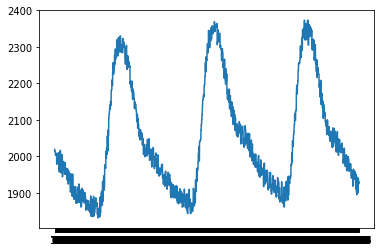

In [3]:
#plotting data in the data_third_interval
for i in range(1): #first row
    plt.plot(data_third_interval.loc[i])
    plt.show()

In [4]:
#total samplings=2100
#consider on X-axis 1sec=1000samplings
#therefore total time interval=2.1sec

timestep=0.001
time_vec = np.linspace(0.0, 2.1, 2100)
print(time_vec)

[0.00000000e+00 1.00047642e-03 2.00095283e-03 ... 2.09799905e+00
 2.09899952e+00 2.10000000e+00]


In [5]:

ppgwave=data_third_interval.loc[2]

ppg_fit=fftpack.fft(np.array(ppgwave))
print(ppg_fit)

ppgarr=np.array(ppgwave)

ppgarr.argmax()
print(ppg_fit[2],ppg_fit[0])

[ 4.24300500e+06     -0.j         -3.70261130e+03 -21869.24861491j
 -1.00217309e+03-103592.18560956j ... -8.29460221e+03 -51228.55952808j
 -1.00217309e+03+103592.18560956j -3.70261130e+03 +21869.24861491j]
(-1002.1730859692223-103592.18560956337j) (4243005-0j)


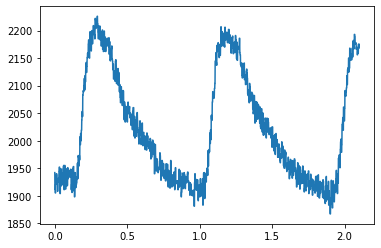

In [6]:
plt.plot(time_vec,ppgwave)


In [7]:
#calculating the amplitude
amp=2 / time_vec.size*np.abs(ppg_fit) 
signal_amplitude = pd.Series(amp).nlargest(2).round(0).astype(int).tolist()
print(signal_amplitude)

[4041, 99]


500.0


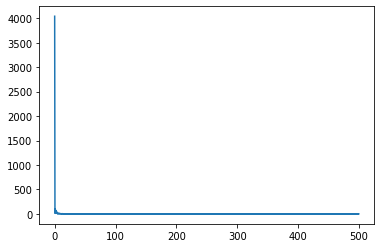

In [8]:
#The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start).
# For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.

sample_freq=abs(fftpack.fftfreq(2100,0.001))
print(sample_freq[1050])

plt.plot(sample_freq,amp)

In [9]:
#calculating frequency magnitude
magnitudes = abs(ppg_fit[np.where(sample_freq >= 0)])
#Get index of top 2 frequencies
peak_frequency = np.sort((np.argpartition(magnitudes, -2)[-2:])/2.1)
print(peak_frequency)

[  0.         999.04761905]


In [10]:
from scipy.signal import butter,filtfilt
# Filter requirements.
fs = 1000.0       # sample rate, Hz
     # desired cutoff frequency of the filter, Hz , slightly higher than actual 2 Hz
order = 2      

def butter_lowpass_filter(data, cutoff, fs, order):
    print("Cutoff freq " + str(cutoff))
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a,data)
    return y
# Filter the data, and plot filtered signals.


In [11]:
data=data_third_interval.copy()

In [12]:
#applying butter-low-pass filter on all 219 ppg signals

for i in range(data_third_interval.shape[0]):
  ppgwave=data_third_interval.loc[i]  #ppgwave contains every single signal values
  ppg_fit=fftpack.fft(np.array(ppgwave)) #fit the ppgwave to fft
  ppgarr=np.array(ppgwave)
  amp=2 / time_vec.size*np.abs(ppg_fit)
  sample_freq=fftpack.fftfreq(2100,0.001)
  signal_amplitude = pd.Series(amp).nlargest(2).round(0).astype(int).tolist()
  magnitudes = abs(ppg_fit[np.where(sample_freq >= 0)])
#Get index of top 2 frequencies\
  peak_frequency = np.sort((np.argpartition(magnitudes, -2)[-2:])/2.1)
  cutoff = peak_frequency[1]
  y = butter_lowpass_filter(ppgarr, cutoff, fs, order) #returns filtered signal values
  data_third_interval.loc[i]=y  #filterd values is storeed back to data_third_interval



Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 0.9523809523809523
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 0.9523809523809523
Cutoff freq 0.9523809523809523
Cutoff freq 0.9523809523809523
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 0.9523809523809523
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 0.9523809523809523
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 0.9523809523809523
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 1.4285714285714286
Cutoff freq 0.9523809523809523
Cutoff freq 1.4285714285714286
Cutoff f

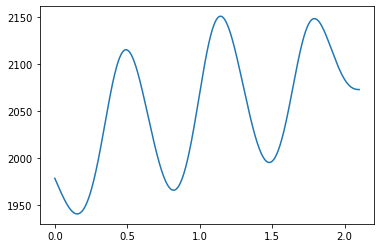

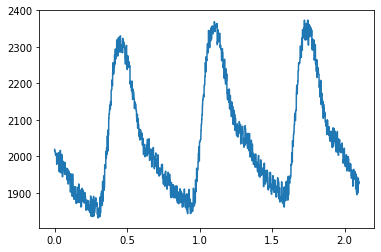

In [13]:
#visualizing sample example
for i in range(1):
  plt.plot(time_vec,data_third_interval.iloc[i])
  plt.show()
  plt.plot(time_vec,data.iloc[i])
  plt.show()

In [14]:
#highest and adjecent peak detection
count=0
def findpeaks(arr,k):
  pair=[]
  flag=False
  for i in range(1,len(arr)-1):
    if arr[i-1]<arr[i] and arr[i]>arr[i+1] and flag==False :
  
      pair.append(i)
  if len(pair)==0 or len(pair)==1:
    return pd.DataFrame([np.zeros(len(arr))]).transpose()
  currmax=0
  if len(pair)>2:
    for i in range(1,len(pair)-1):
      if arr[pair[i]]+arr[pair[i-1]]>=arr[pair[i]]+arr[pair[i+1]] and arr[pair[i]]+arr[pair[i-1]]>currmax:
        find=pair[i-1]
        sind=pair[i]
        currmax=arr[pair[i]]+arr[pair[i-1]]
      elif arr[pair[i]]+arr[pair[i-1]]<=arr[pair[i]]+arr[pair[i+1]] and arr[pair[i]]+arr[pair[i+1]]>currmax:
        find=pair[i]
        sind=pair[i+1]
        currmax=arr[pair[i]]+arr[pair[i+1]]
      
    return data_third_interval.iloc[k,find:sind+1]
  return data_third_interval.iloc[k,pair[0]:pair[1]]


In [15]:
dfpeak=pd.DataFrame() #creating a empty dataframe
third_interval_peaks=pd.DataFrame()  #creating a dataframe to store values which are present in between the adj highest peaks
for i in range(data_third_interval.shape[0]):
  arr=np.array(data_third_interval.loc[i])
  array=findpeaks(arr,i)
  #print(array.values)
  dfpeak=pd.DataFrame(array.values).transpose()
  third_interval_peaks=pd.concat([third_interval_peaks,dfpeak])
  # print(third_interval_peaks)

In [16]:
third_interval_peaks.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,2150.514680,2150.509156,2150.494998,2150.472237,2150.440905,2150.401034,2150.352657,2150.295808,2150.230523,2150.156837,2150.074788,2149.984413,2149.885749,2149.778838,2149.663718,2149.540432,2149.409021,2149.269528,2149.121997,2148.966473,2148.803002,2148.631628,2148.452400,2148.265363,2148.070567,2147.868060,2147.657890,2147.440107,2147.214762,2146.981905,2146.741587,2146.493861,2146.238778,2145.976391,2145.706754,2145.429921,2145.145946,2144.854883,2144.556788,2144.251715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2043.055712,2043.054264,2043.050179,2043.043461,2043.034115,2043.022149,2043.007568,2042.990379,2042.970588,2042.948203,2042.923232,2042.895681,2042.865560,2042.832876,2042.797638,2042.759854,2042.719534,2042.676687,2042.631322,2042.583450,2042.533081,2042.480224,2042.424892,2042.367094,2042.306842,2042.244149,2042.179024,2042.111481,2042.041532,2041.969188,2041.894463,2041.817370,2041.737921,2041.656129,2041.572009,2041.485574,2041.396837,2041.305812,2041.212515,2041.116958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2075.394355,2075.393189,2075.389657,2075.383765,2075.375514,2075.364909,2075.351953,2075.336649,2075.319001,2075.299013,2075.276690,2075.252035,2075.225052,2075.195747,2075.164124,2075.130187,2075.093941,2075.055392,2075.014545,2074.971404,2074.925975,2074.878265,2074.828278,2074.776020,2074.721497,2074.664715,2074.605680,2074.544399,2074.480879,2074.415124,2074.347143,2074.276941,2074.204526,2074.129904,2074.053083,2073.974069,2073.892870,2073.809493,2073.723945,2073.636234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2055.592002,2055.591716,2055.588056,2055.581030,2055.570645,2055.556909,2055.539829,2055.519415,2055.495674,2055.468617,2055.438252,2055.404590,2055.367640,2055.327413,2055.283919,2055.237170,2055.187177,2055.133952,2055.077507,2055.017855,2054.955009,2054.888983,2054.819791,2054.747446,2054.671964,2054.593359,2054.511647,2054.426843,2054.338963,2054.248024,2054.154041,2054.057032,2053.957014,2053.854003,2053.748018,2053.639076,2053.527195,2053.412394,2053.294690,2053.174103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2043.651408,2043.648838,2043.643606,2043.635715,2043.625173,2043.611985,2043.596156,2043.577693,2043.556602,2043.532889,2043.506561,2043.477625,2043.446087,2043.411955,2043.375236,2043.335937,2043.294066,2043.249631,2043.202642,2043.153105,2043.101030,2043.046425,2042.989301,2042.929665,2042.867528,2042.802900,2042.735791,2042.666210,2042.594170,2042.519679,2042.442751,2042.363395,2042.281624,2042.197449,2042.110881,2042.021932,2041.930615,2041.836942,2041.740925,2041.642577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
third_interval_peaks.to_csv('third_interval_peaks.csv',index=False)

In [18]:
third_interval_peaks=pd.read_csv('third_interval_peaks.csv')

In [19]:
third_interval_peaks.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,2150.514680,2150.509156,2150.494998,2150.472237,2150.440905,2150.401034,2150.352657,2150.295808,2150.230523,2150.156837,2150.074788,2149.984413,2149.885749,2149.778838,2149.663718,2149.540432,2149.409021,2149.269528,2149.121997,2148.966473,2148.803002,2148.631628,2148.452400,2148.265363,2148.070567,2147.868060,2147.657890,2147.440107,2147.214762,2146.981905,2146.741587,2146.493861,2146.238778,2145.976391,2145.706754,2145.429921,2145.145946,2144.854883,2144.556788,2144.251715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2043.055712,2043.054264,2043.050179,2043.043461,2043.034115,2043.022149,2043.007568,2042.990379,2042.970588,2042.948203,2042.923232,2042.895681,2042.865560,2042.832876,2042.797638,2042.759854,2042.719534,2042.676687,2042.631322,2042.583450,2042.533081,2042.480224,2042.424892,2042.367094,2042.306842,2042.244149,2042.179024,2042.111481,2042.041532,2041.969188,2041.894463,2041.817370,2041.737921,2041.656129,2041.572009,2041.485574,2041.396837,2041.305812,2041.212515,2041.116958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2075.394355,2075.393189,2075.389657,2075.383765,2075.375514,2075.364909,2075.351953,2075.336649,2075.319001,2075.299013,2075.276690,2075.252035,2075.225052,2075.195747,2075.164124,2075.130187,2075.093941,2075.055392,2075.014545,2074.971404,2074.925975,2074.878265,2074.828278,2074.776020,2074.721497,2074.664715,2074.605680,2074.544399,2074.480879,2074.415124,2074.347143,2074.276941,2074.204526,2074.129904,2074.053083,2073.974069,2073.892870,2073.809493,2073.723945,2073.636234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2055.592002,2055.591716,2055.588056,2055.581030,2055.570645,2055.556909,2055.539829,2055.519415,2055.495674,2055.468617,2055.438252,2055.404590,2055.367640,2055.327413,2055.283919,2055.237170,2055.187177,2055.133952,2055.077507,2055.017855,2054.955009,2054.888983,2054.819791,2054.747446,2054.671964,2054.593359,2054.511647,2054.426843,2054.338963,2054.248024,2054.154041,2054.057032,2053.957014,2053.854003,2053.748018,2053.639076,2053.527195,2053.412394,2053.294690,2053.174103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2043.651408,2043.648838,2043.643606,2043.635715,2043.625173,2043.611985,2043.596156,2043.577693,2043.556602,2043.532889,2043.506561,2043.477625,2043.446087,2043.411955,2043.375236,2043.335937,2043.294066,2043.249631,2043.202642,2043.153105,2043.101030,2043.046425,2042.989301,2042.929665,2042.867528,2042.802900,2042.735791,2042.666210,2042.594170,2042.519679,2042.442751,2042.363395,2042.281624,2042.197449,2042.110881,2042.021932,2041.930615,2041.836942,2041.740925,2041.642577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
third_interval_peaks.shape

(219, 2100)